In [2]:
!pip install ConfigParser
!pip install wordcloud

In [8]:
import re
import pandas as pd
import os
import tweepy as tw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

[twitter]
accesstoken=xxxx

accesstokensecret=xxxx

apikey=xxxxxx

apisecretkey=xxxxxx

googleapikey=xxxxxxx

In [7]:
import configparser
config = configparser.RawConfigParser()
config.read('./ML Project.txt')

print(config.sections());


['twitter']


In [9]:
accesstoken=config.get('twitter', 'accesstoken')
accesstokensecret=config.get('twitter', 'accesstokensecret')
apikey=config.get('twitter', 'apikey')
apisecretkey=config.get('twitter', 'apisecretkey')

In [10]:
auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [60]:
search_words = "#jantacurfew" or "thaalibajao"
date_since = "2020-03-19"

In [61]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)

In [62]:
tweets

In [63]:
tweet_details = [[ tweet.text,tweet.user.screen_name, tweet.user.location] for tweet in tweets]
#tweet_details

In [64]:
tweet_df = pd.DataFrame(data=tweet_details, columns=['text','user', "location"])

In [65]:
pd.set_option('max_colwidth', 800)

tweet_df.head(20)

,text,user,location
0,"RT @apps_iraa: My dream home is anyplace that's filled with plants of all shapes, sizes, colors..\n🏡🌱🌿🌴🌻🍁🌸🍀\n.\n.\n.\n.\n.\n📸Self timer By Candy😅📷…",2saiha,Ujjain
1,"RT @akshaykumar: An excellent initiative by PM @narendramodi ji...this Sunday, March 22 from 7 am to 9 pm let’s all join in the #JantaCurfe…",Priya36792892,
2,"RT @ashchanchlani: This was a historic moment\nMy entire city was in great synchronization ❤️ \nThank you our doctors, Nurses, Policemen, Off…",YasirAr09268481,"Lahore, Pakistan"
3,"◾#Modi announced #JantaCurfew, #sanghis came out with 14 hr theory\n◾#Modi announced #ThaliBajao, idiots came out wi… https://t.co/7qYfZbwCsq",SaintIGNUtius,
4,RT @PotholeWarriors: @mohan_amin @OfficeofUT @ANI #MarineDrive CISF patrolling to maintain social distancing \n\n&amp; today this happened..\n\nEac…,JAYAVARSHINI8,India
5,"RT @akshaykumar: An excellent initiative by PM @narendramodi ji...this Sunday, March 22 from 7 am to 9 pm let’s all join in the #JantaCurfe…",Chirag99623933,
6,RT @PoojaaShrivas10: Thanking and motivation to all those who work hard for us with full dedication.🙏\n#JantaCurfew\n#JantaCurfewPledge #Coro…,shivamsingaaa,"Dibiyapur, India"
7,RT @TheRashamiDesai: #jantacurfew lets support our PM \nand show the Power of togetherness. Let’s do this for our real #unseenheros who are…,TheMeghaRai,"Punjab, India"
8,RT @TheZaiduLeaks: Told Gen Bajwa that as Indians are making sounds from their balconies on #JantaCurfew to cheer up their Nation we must a…,mohodyash2002,maharashtra
9,"RT @anuj_chandak: Tomorrow #My14ForIndia is to chill out playing with my daughter. Reading news online, watching a movie on @HotstarPremiu…",RajeshA26251880,


In [66]:
tweet_df.user.value_counts()

roufaminnews5      18
2saiha              3
nirav013            2
apps_iraa           2
mani_divy           2
                   ..
Anilsai456          1
MOHITGU83425270     1
shabira68878348     1
rajubanerjeebjp     1
sidfan333           1
Name: user, Length: 77, dtype: int64

In [67]:
tweet_df.location.value_counts()

                             28
Jammu And Kashmir            18
India                        10
Mumbai, India                 3
Ujjain                        3
Pune, india                   2
Bengaluru, India              2
New Delhi, India              2
Great Punjab , IN             1
maharashtra                   1
Pune, India                   1
Hell                          1
Jammu, Jammu And Kashmir      1
Jhansi,India                  1
Punjab, India                 1
Ahmedabad                     1
BENGALURU                     1
Kolkata                       1
मुंबई, भारत                   1
Dibiyapur, India              1
Ontario, Canada               1
Ahmedabad India               1
Pantnagar                     1
Noida                         1
Srikalahasthi, India          1
Akhand Bharat                 1
Vishakhapatnam, India         1
Siddhashram Chamoli India     1
Ludhiana, India               1
Ghatkopar East, Mumbai        1
वाराणसी,भारत                  1
Greater 

In [68]:
tweet_df.dtypes

text        object
user        object
location    object
dtype: object

In [69]:
import re
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [70]:
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))

In [71]:
tweet_df.head(20)

,text,user,location
0,"My dream home is anyplace that's filled with plants of all shapes, sizes, colors..🏡🌱🌿🌴🌻🍁🌸🍀.....📸Self timer By Candy😅📷…",2saiha,Ujjain
1,"An excellent initiative by PM ji...this Sunday, March 22 from 7 am to 9 pm let’s all join in the #JantaCurfe…",Priya36792892,
2,"This was a historic momentMy entire city was in great synchronization ❤️ Thank you our doctors, Nurses, Policemen, Off…",YasirAr09268481,"Lahore, Pakistan"
3,"◾#Modi announced #JantaCurfew, #sanghis came out with 14 hr theory◾#Modi announced #ThaliBajao, idiots came out wi…",SaintIGNUtius,
4,#MarineDrive CISF patrolling to maintain social distancing &amp; today this happened..Eac…,JAYAVARSHINI8,India
5,"An excellent initiative by PM ji...this Sunday, March 22 from 7 am to 9 pm let’s all join in the #JantaCurfe…",Chirag99623933,
6,Thanking and motivation to all those who work hard for us with full dedication.🙏#JantaCurfew#JantaCurfewPledge #Coro…,shivamsingaaa,"Dibiyapur, India"
7,#jantacurfew lets support our PM and show the Power of togetherness. Let’s do this for our real #unseenheros who are…,TheMeghaRai,"Punjab, India"
8,Told Gen Bajwa that as Indians are making sounds from their balconies on #JantaCurfew to cheer up their Nation we must a…,mohodyash2002,maharashtra
9,"Tomorrow #My14ForIndia is to chill out playing with my daughter. Reading news online, watching a movie on …",RajeshA26251880,


In [72]:
tweet_df.to_csv('tweets.csv')

#to know what people are talking about
!pip install spacy
import spacy 
  
nlp = spacy.load('en_core_web_sm') 

tweet_df['text'].apply(lambda x: [print("\tText : {}, Entity : {}".format(ent.text, ent.label_)) if (not ent.text.startswith('#')) else ""  for ent in nlp(x).ents])

tweet_df['entities']=tweet_df['text'].apply(lambda x: [(ent.text, ent.label_) if (not ent.text.startswith('#')) else "" for ent in nlp(x).ents])

,geo,text,user,location,entities
0,None,"Nothing can stop a team 🗨️👥 As a go to communication platform for schools during #Lockdown, this week's #WakeUpWednesd…",nyccschoolsict,"Northallerton, North Yorkshire","[(Lockdown, PERSON), (week, DATE)]"
1,None,India need strict #lockdown once againIf we really want to control this pandemicwithout lockdown it is not going to po…,warriorhasi_iaf,India 🇮🇳,"[(India, GPE)]"
2,None,"Nothing can stop a team 🗨️👥 As a go to communication platform for schools during #Lockdown, this week's #WakeUpWednesd…",carers_voice,"Knowsley, England","[(Lockdown, PERSON), (week, DATE)]"
3,None,Obvs a drunk tweet. Self-medicating during civil rights #lockdown.,pH1Online,N.E. U.K.,[]
4,None,My cartoon Wednesday .......#BorisJohnson misses the bus. Repeatedly. #lockdown #testing #PPE #carehomes #school…,iratebadger,,"[(Wednesday, DATE), (BorisJohnson, PERSON), , ]"
5,None,My cartoon Wednesday .......#BorisJohnson misses the bus. Repeatedly. #lockdown #testing #PPE #carehomes #school…,kernow4corbyn,Cornwall,"[(Wednesday, DATE), (BorisJohnson, PERSON), , ]"
6,None,Today we have launched our first exclusively digital copy of Contact magazine. Full of interesting features and advice on…,anthonymccann,"Living in Bangor, N.Ireland","[(Today, DATE), (first, ORDINAL), (Contact, ORG)]"
7,None,My cartoon Wednesday .......#BorisJohnson misses the bus. Repeatedly. #lockdown #testing #PPE #carehomes #school…,HuwSayer,"Norwich, UK","[(Wednesday, DATE), (BorisJohnson, PERSON), , ]"
8,None,Our #animals have been so spoilt in #lockdown with free run of the #park. Here’s a few of our favourite photos. Please re…,Edspire,"Tonbridge, Kent",[]
9,None,I think it's fair to say we've all had a #badhairday at some point during #lockdown - how about freshening up your…,GeorgeYard,"Braintree, Essex",[]


In [77]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\VEDITA
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...


True

In [103]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))


SyntaxError: invalid syntax (<ipython-input-103-5f491bdb8528>, line 4)

In [79]:
#Tokenization-dividing the tweet into seperate phrases
tokenized_tweet=tweet_df['text'].apply(lambda x:x.split())
tokenized_tweet.head(3)

0       [My, dream, home, is, anyplace, that's, filled, with, plants, of, all, shapes,, sizes,, colors..🏡🌱🌿🌴🌻🍁🌸🍀.....📸Self, timer, By, Candy😅📷…]
1            [An, excellent, initiative, by, PM, ji...this, Sunday,, March, 22, from, 7, am, to, 9, pm, let’s, all, join, in, the, #JantaCurfe…]
2    [This, was, a, historic, momentMy, entire, city, was, in, great, synchronization, ❤️, Thank, you, our, doctors,, Nurses,, Policemen,, Off…]
Name: text, dtype: object

In [80]:
#Stemming: removes ing,es,s
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [My, dream, home, is, anyplac, that', fill, with, plant, of, all, shapes,, sizes,, colors..🏡🌱🌿🌴🌻🍁🌸🍀.....📸self, timer, By, candy😅📷…]
1               [An, excel, initi, by, PM, ji...thi, sunday,, march, 22, from, 7, am, to, 9, pm, let’, all, join, in, the, #jantacurfe…]
2         [thi, wa, a, histor, momentmi, entir, citi, wa, in, great, synchron, ❤️, thank, you, our, doctors,, nurses,, policemen,, off…]
3         [◾#modi, announc, #jantacurfew,, #sanghi, came, out, with, 14, hr, theory◾#modi, announc, #thalibajao,, idiot, came, out, wi…]
4                                            [#marinedr, cisf, patrol, to, maintain, social, distanc, &amp;, today, thi, happened..eac…]
Name: text, dtype: object

In [81]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweet_df['text'] = tokenized_tweet

In [84]:
#removing words like hmm,the ,short words
tweet_df['text'] = tweet_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

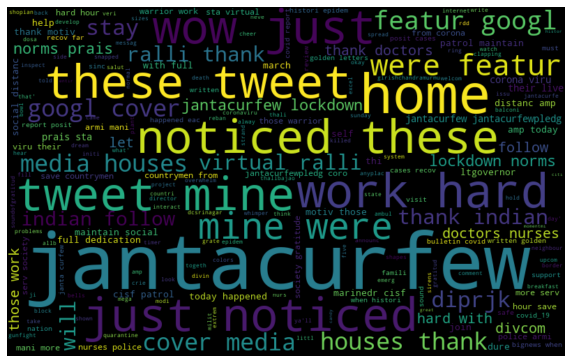

In [86]:
all_words = ' '.join([text for text in tweet_df['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [118]:
sid = SentimentIntensityAnalyzer()

In [119]:
tweet_df['sentiment']=tweet_df['text'].apply(lambda x: sid.polarity_scores(x))


In [122]:
!pip install TextBlob

In [130]:
from textblob import TextBlob
tweet_df['polarity_score']=tweet_df['text'].apply(lambda text:TextBlob(text).sentiment.polarity )

In [131]:
tweet_df.head(10)

,text,user,location,sentiment,polarity_score
0,"dream home anyplac that' fill with plant shapes, sizes, colors..🏡🌱🌿🌴🌻🍁🌸🍀.....📸self timer candy😅📷…",2saiha,Ujjain,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.25}",0.000000
1,"excel initi ji...thi sunday, march from let’ join #jantacurfe…",Priya36792892,,"{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}",0.000000
2,"histor momentmi entir citi great synchron thank doctors, nurses, policemen, off…",YasirAr09268481,"Lahore, Pakistan","{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.765}",0.800000
3,"◾#modi announc #jantacurfew, #sanghi came with theory◾#modi announc #thalibajao, idiot came",SaintIGNUtius,,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}",-0.800000
4,#marinedr cisf patrol maintain social distanc &amp; today happened..eac…,JAYAVARSHINI8,India,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.033333
5,"excel initi ji...thi sunday, march from let’ join #jantacurfe…",Chirag99623933,,"{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}",0.000000
6,thank motiv those work hard with full dedication.🙏#jantacurfew#jantacurfewpledg #coro…,shivamsingaaa,"Dibiyapur, India","{'neg': 0.128, 'neu': 0.642, 'pos': 0.229, 'compound': 0.2732}",0.029167
7,#jantacurfew support show power togetherness. let’ real #unseenhero are…,TheMeghaRai,"Punjab, India","{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}",0.200000
8,told bajwa that indian make sound from their balconi #jantacurfew cheer their nation must,mohodyash2002,maharashtra,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5106}",0.400000
9,"tomorrow #my14forindia chill play with daughter. read news online, watch movi",RajeshA26251880,,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.34}",0.000000


In [133]:
tweet_df['polarity']=tweet_df['polarity_score'].apply(lambda x:'positive' if x>0 else('negative' if x<0 else 'neutral'))

In [134]:
tweet_df['label']=tweet_df['polarity'].apply(lambda x:1 if x=="positive" else(-1 if x=="negative" else 0))

In [135]:
tweet_df

,text,user,location,sentiment,polarity_score,label,polarity
0,"dream home anyplac that' fill with plant shapes, sizes, colors..🏡🌱🌿🌴🌻🍁🌸🍀.....📸self timer candy😅📷…",2saiha,Ujjain,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.25}",0.000000,0,neutral
1,"excel initi ji...thi sunday, march from let’ join #jantacurfe…",Priya36792892,,"{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}",0.000000,0,neutral
2,"histor momentmi entir citi great synchron thank doctors, nurses, policemen, off…",YasirAr09268481,"Lahore, Pakistan","{'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.765}",0.800000,1,positive
3,"◾#modi announc #jantacurfew, #sanghi came with theory◾#modi announc #thalibajao, idiot came",SaintIGNUtius,,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.5106}",-0.800000,-1,negative
4,#marinedr cisf patrol maintain social distanc &amp; today happened..eac…,JAYAVARSHINI8,India,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.033333,1,positive
...,...,...,...,...,...,...,...
95,watch unfold veri close london. messag take veri serious follow guid…,Adityagt2211,India,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.0772}",-0.333333,-1,negative
96,"overwhelm gratitud shown famili &amp; neighbour clapping, ring bells, thali welcom back home.thi",SangitaTripat17,"वाराणसी,भारत","{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.1779}",0.000000,0,neutral
97,#ddcganderb review perform #rdd#diprjk #ltgovernor #girishchandramurmu…,roufaminnews5,Jammu And Kashmir,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.000000,0,neutral
98,"overwhelm gratitud shown famili &amp; neighbour clapping, ring bells, thali welcom back home.thi",SomrajB20817570,"मुंबई, भारत","{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.1779}",0.000000,0,neutral


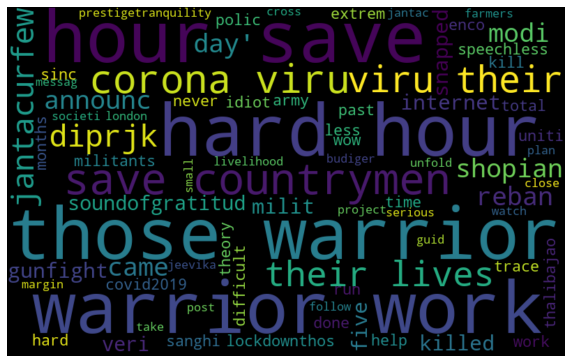

In [138]:
#negative words

neg_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

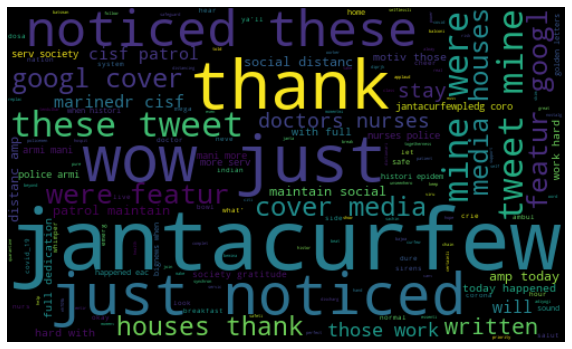

In [141]:
#positive words

pos_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == 1]])

wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

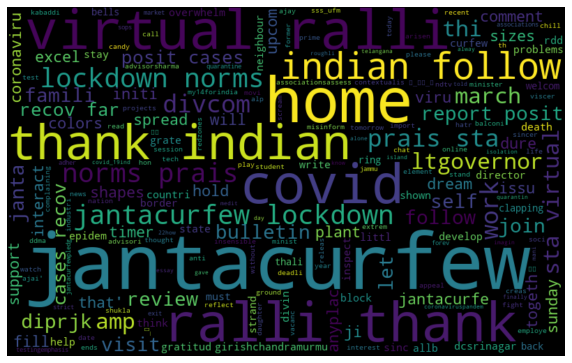

In [148]:
#neutral words

normal_words =' '.join([text for text in tweet_df['text'][tweet_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

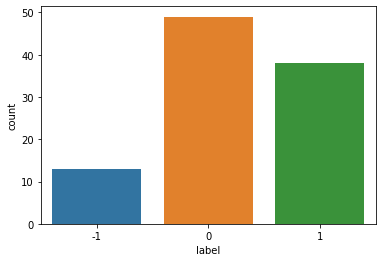

In [144]:
sns.countplot(x='label',data=tweet_df)